# The Elastic Net

The elastic net is a penalized version of linear regression, which assumes a model of the form
$$
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$
where $\mathbf{Y}$ is a known $n \times 1$ observed response variable vector, $\mathbf{X}$ is a known $n \times (p + 1)$ observed explanatory variable matrix, $\boldsymbol{\beta}$ is an unknown $(p + 1) \times 1$ coefficient vector, and $\boldsymbol{\varepsilon}$ is an unknown vector of i.i.d. Gaussian errors with mean zero and unknown variance.
The classical least-squares estimator of $\boldsymbol{\beta}$ is
$$
\widehat{\boldsymbol{\beta}}_{\mathrm{LS}}
= \left(\mathbf{X}^\top \mathbf{X}\right)^- \mathbf{X}^\top \mathbf{Y},
$$
where $\left(\mathbf{X}^\top \mathbf{X}\right)^-$ is a generalized inverse of $\mathbf{X}^\top \mathbf{X}$.
Equivalently,
$$
\widehat{\boldsymbol{\beta}}_{\mathrm{LS}}
\in \mathrm{argmin}_{\boldsymbol{\beta} \in \mathbb{R}^{p + 1}}
\left(\frac{1}{2 n} \left\|\mathbf{Y} - \mathbf{X} \boldsymbol{\beta}\right\|_2^2\right).
$$
An *elastic net estimator* of $\boldsymbol{\beta}$ is any
$$
\widehat{\boldsymbol{\beta}}_{\mathrm{EN}}
\in \mathrm{argmin}_{\boldsymbol{\beta} \in \mathbb{R}^{p + 1}}
\left[\frac{1}{2 n} \left\|\mathbf{Y} - \mathbf{X} \boldsymbol{\beta}\right\|_2^2 + \lambda\left(\alpha \left\|\boldsymbol{\beta}\right\|_1 + \frac{1 - \alpha}{2} \left\|\boldsymbol{\beta}\right\|_2^2\right)\right]
$$
for some fixed $\alpha \in [0, 1]$ and $\lambda > 0$.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from mltools.glm import LinearRegression, ElasticNet

In [2]:
# Set NumPy random number generator seed for replicability
np.random.seed(100)

## Load the Boston Housing Data

In [3]:
data = datasets.load_boston()

# Shuffle data
n = len(data.target)
idx = np.random.permutation(n)
x = data.data[idx, :]
y = data.target[idx]

# 50/50 training/testing split
x_train = x[:(n // 2), :]
x_test = x[(n // 2):, :]
y_train = y[:(n // 2)]
y_test = y[(n // 2):]

## Fit a Classical Linear Regression Model

In [4]:
%%time
model = LinearRegression().fit(x_train, y_train)

CPU times: user 1.05 ms, sys: 233 µs, total: 1.29 ms
Wall time: 1.3 ms


### Report Mean Squared Error

In [5]:
mse_train = model.mse(x_train, y_train)
mse_test = model.mse(x_test, y_test)
mse_full = model.mse(x, y)
print(f"Training MSE:   {mse_train:.3f}")
print(f"Testing MSE:    {mse_test:.3f}")
print(f"Full data MSE:  {mse_full:.3f}")

Training MSE:   23.630
Testing MSE:    23.131
Full data MSE:  23.381


## Fit an Elastic Net Model

In [6]:
%%time
model = ElasticNet(alpha=1, lam=0.01)
model.fit(x_train, y_train, verbose=True)

Fitted elastic net (λ: 0.01, α: 1.0) with 253 observations, 13 predictors
	Number of iterations: 34 (tolerance: 0.0001)
	Final (standardized) elastic net loss: 0.15511
CPU times: user 23.5 ms, sys: 9.6 ms, total: 33.1 ms
Wall time: 30.3 ms


### Report Mean Squared Error

In [7]:
mse_train = model.mse(x_train, y_train)
mse_test = model.mse(x_test, y_test)
mse_full = model.mse(x, y)
print(f"Training MSE:   {mse_train:.3f}")
print(f"Testing MSE:    {mse_test:.3f}")
print(f"Full data MSE:  {mse_full:.3f}")

Training MSE:   24.201
Testing MSE:    22.011
Full data MSE:  23.106


## Regularization Path

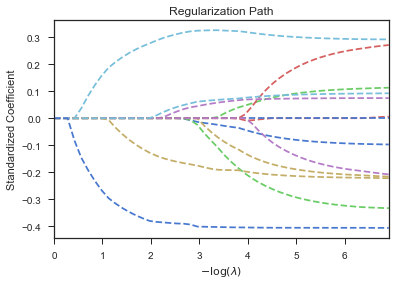

In [8]:
lam_min = 0.001
lam_max = 1

plt.figure()
model.path_plot(x, y, lam_min, lam_max, ls="--")
plt.show()
plt.close()

## References

* Zou Hui, Trevor Hastie.
  "Regularization and Variable Selection via the Elastic Net".
  Journal of the Royal Statistical Society, Series B. Vol. 67, No. 2, 2005, pp. 301--320.
  ([DOI](https://doi.org/10.1111/j.1467-9868.2005.00503.x))
* Jerome Friedman, Trevor Hastie, and Robert Tibshirani.
  "Regularization Paths for Generalized Linear Models via Coordinate Descent".
  Journal of Statistical Software Vol. 33, No. 1, 2010, pp. 1--22.
  ([PMCID](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2929880/))